<a href="https://colab.research.google.com/github/NeonLabs146/Neural-network/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab 2: Multilayer Perceptron (MLP) on Iris Dataset**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Convert iris data to a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable to the DataFrame
iris_df['target'] = iris.target

# Display the first 5 rows of the DataFrame
display(iris_df.tail())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
X = iris_df.drop('target', axis=1)
y = iris_df['target']

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_encoded = to_categorical(y)

In [ ]:
X_scaled.shape, y_encoded.shape

((150, 4), (150, 3))

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

In [ ]:
# Build MLP model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

In [ ]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 86.67%


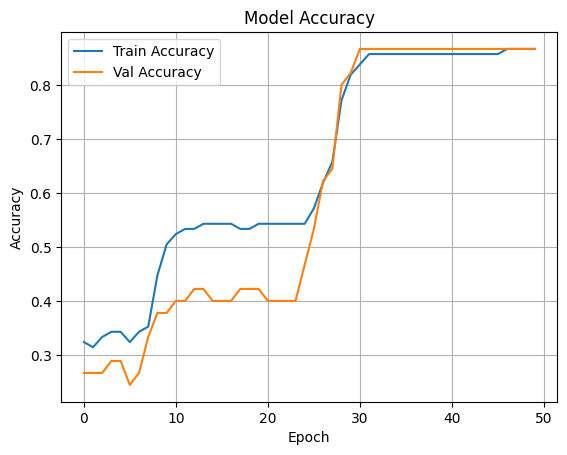

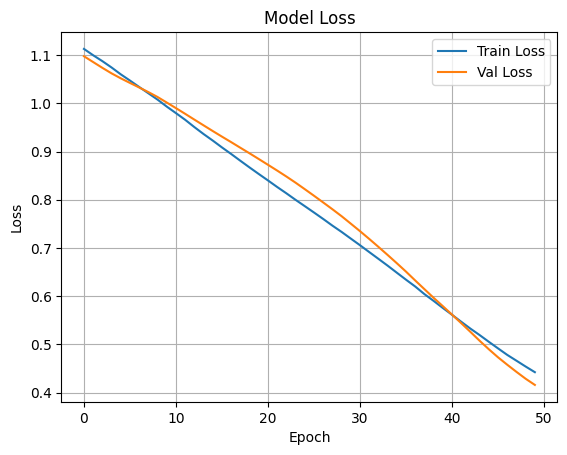

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Predict and compare with true values
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

print("\nSample Predictions:")
for i in range(5):
    print(f"True: {true_labels[i]}, Predicted: {pred_labels[i]}")


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Sample Predictions:
True: 1, Predicted: 1
True: 0, Predicted: 0
True: 2, Predicted: 2
True: 1, Predicted: 1
True: 1, Predicted: 1


##**MLP only uisng Numpy**

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
# One-hot encoding
def one_hot(y, num_classes):
    one_hot_encoded = np.zeros((len(y), num_classes))
    one_hot_encoded[np.arange(len(y)), y] = 1
    return one_hot_encoded

In [6]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_encoded = one_hot(y, 3)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [8]:
# Activation functions and derivatives
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return z > 0

def softmax(z):
    exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [9]:
# Loss function
def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

In [10]:
# Network architecture
input_dim = X_train.shape[1]  # 4
hidden1 = 10
hidden2 = 8
hidden3 = 6
output_dim = 3
lr = 0.01
epochs = 100

In [11]:
# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_dim, hidden1)
b1 = np.zeros((1, hidden1))
W2 = np.random.randn(hidden1, hidden2)
b2 = np.zeros((1, hidden2))
W3 = np.random.randn(hidden2, hidden3)
b3 = np.zeros((1, hidden3))
W4 = np.random.randn(hidden3, output_dim)
b4 = np.zeros((1, output_dim))

In [12]:
train_acc_history = []
train_loss_history = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X_train, W1) + b1
    a1 = relu(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)

    z3 = np.dot(a2, W3) + b3
    a3 = relu(z3)

    z4 = np.dot(a3, W4) + b4
    y_pred = softmax(z4)

    # Loss and accuracy
    loss = cross_entropy(y_train, y_pred)
    acc = accuracy_score(np.argmax(y_train, axis=1), np.argmax(y_pred, axis=1))
    train_acc_history.append(acc)
    train_loss_history.append(loss)

    # Backward pass
    dz4 = y_pred - y_train
    dW4 = np.dot(a3.T, dz4)
    db4 = np.sum(dz4, axis=0, keepdims=True)

    da3 = np.dot(dz4, W4.T)
    dz3 = da3 * relu_derivative(z3)
    dW3 = np.dot(a2.T, dz3)
    db3 = np.sum(dz3, axis=0, keepdims=True)

    da2 = np.dot(dz3, W3.T)
    dz2 = da2 * relu_derivative(z2)
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)
    dW1 = np.dot(X_train.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weights
    W4 -= lr * dW4
    b4 -= lr * db4
    W3 -= lr * dW3
    b3 -= lr * db3
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

Epoch 0, Loss: 4.9197, Accuracy: 0.2095
Epoch 10, Loss: 1.0633, Accuracy: 0.4381
Epoch 20, Loss: 0.6731, Accuracy: 0.7048
Epoch 30, Loss: 0.4829, Accuracy: 0.8476
Epoch 40, Loss: 0.3721, Accuracy: 0.8762
Epoch 50, Loss: 0.2082, Accuracy: 0.9619
Epoch 60, Loss: 0.3029, Accuracy: 0.8952
Epoch 70, Loss: 0.2406, Accuracy: 0.9048
Epoch 80, Loss: 0.1879, Accuracy: 0.9143
Epoch 90, Loss: 0.1475, Accuracy: 0.9238


In [13]:
# Evaluate on test data
z1 = np.dot(X_test, W1) + b1
a1 = relu(z1)
z2 = np.dot(a1, W2) + b2
a2 = relu(z2)
z3 = np.dot(a2, W3) + b3
a3 = relu(z3)
z4 = np.dot(a3, W4) + b4
y_test_pred = softmax(z4)

test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1))
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 93.33%


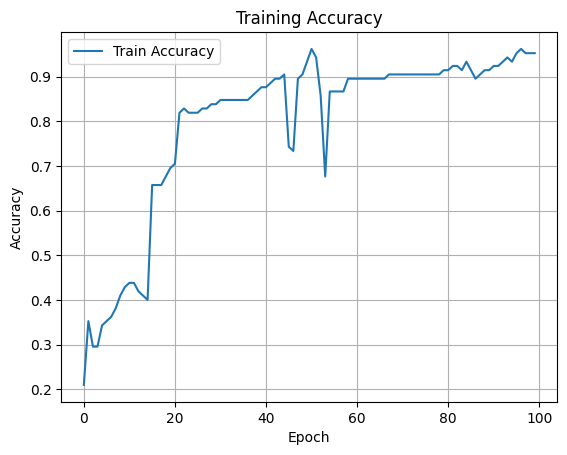

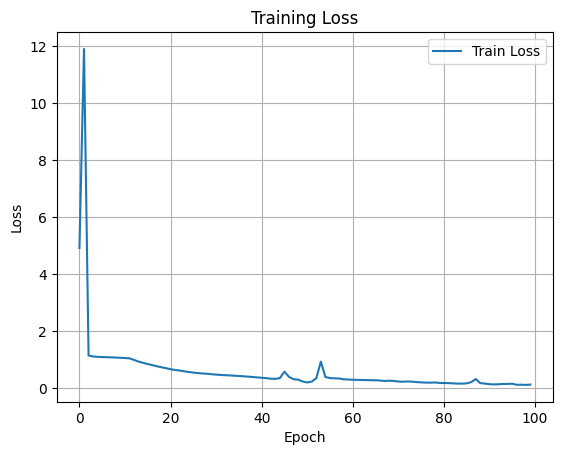


Sample Predictions:
True: 1, Predicted: 1
True: 0, Predicted: 0
True: 2, Predicted: 2
True: 1, Predicted: 1
True: 1, Predicted: 2
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 2, Predicted: 2


In [14]:
# Plotting
plt.plot(train_acc_history, label='Train Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(train_loss_history, label='Train Loss')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

# Sample predictions
print("\nSample Predictions:")
for i in range(8):
    print(f"True: {np.argmax(y_test[i])}, Predicted: {np.argmax(y_test_pred[i])}")


###**Demonstrating the difference in decision boundary between the perceptron and a Bayes classifier.**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

In [63]:
# Step 1: Create a linearly separable Gaussian dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=1.5, random_state=42)

In [64]:
# Step 2: Train Perceptron and Bayes Classifier
perceptron = Perceptron(max_iter=1000, tol=1e-3)
bayes = GaussianNB()

perceptron.fit(X, y)
bayes.fit(X, y)

GaussianNB()

In [65]:
# Step 3: Create a mesh grid for plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

In [66]:
# Step 4: Predict and reshape results
Z_perceptron = perceptron.predict(grid).reshape(xx.shape)
Z_bayes = bayes.predict(grid).reshape(xx.shape)

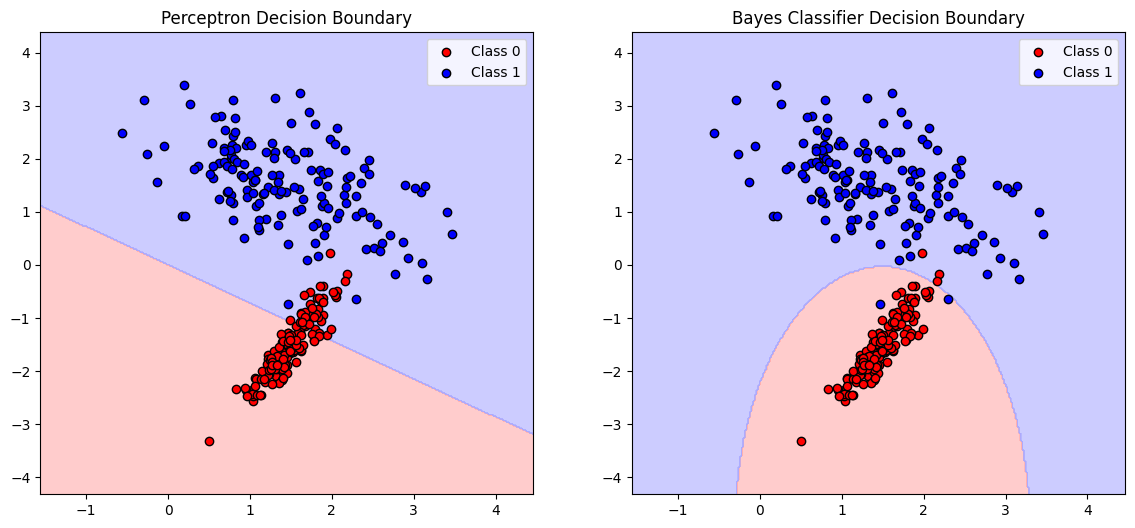

In [67]:
# Step 5: Plot decision boundaries side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
cmap_bg = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_pts = ['red', 'blue']

# Perceptron plot
ax1.contourf(xx, yy, Z_perceptron, cmap=cmap_bg, alpha=0.6)
for i, color in enumerate(cmap_pts):
    ax1.scatter(X[y == i][:, 0], X[y == i][:, 1], color=color, edgecolor='k', label=f"Class {i}")
ax1.set_title("Perceptron Decision Boundary")
ax1.legend()

# Bayes Classifier plot
ax2.contourf(xx, yy, Z_bayes, cmap=cmap_bg, alpha=0.6)
for i, color in enumerate(cmap_pts):
    ax2.scatter(X[y == i][:, 0], X[y == i][:, 1], color=color, edgecolor='k', label=f"Class {i}")
ax2.set_title("Bayes Classifier Decision Boundary")
ax2.legend()

plt.show()

###**The geometric effect of a misclassification correction on the weight vector in the perceptron.**

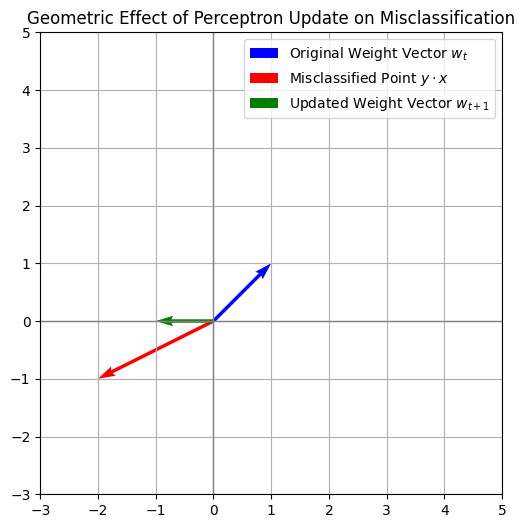

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Misclassified data point (xi, yi)
x = np.array([2, 1])
y = -1  # true label

# Initial weight vector (assume it misclassifies x)
w = np.array([1, 1])

# Weight update rule
w_new = w + y * x

# Plotting
plt.figure(figsize=(8, 6))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

# Plot original weight vector
plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original Weight Vector $w_t$')

# Plot misclassified point (scaled for visualization)
plt.quiver(0, 0, y * x[0], y * x[1], angles='xy', scale_units='xy', scale=1, color='red', label=r'Misclassified Point $y \cdot x$')

# Plot updated weight vector
plt.quiver(0, 0, w_new[0], w_new[1], angles='xy', scale_units='xy', scale=1, color='green', label='Updated Weight Vector $w_{t+1}$')

# Formatting
plt.xlim(-3, 5)
plt.ylim(-3, 5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Geometric Effect of Perceptron Update on Misclassification")
plt.legend()
plt.show()